<a href="https://colab.research.google.com/github/DenizzEmre/loan-default-predictor/blob/main/Copy_of_Loan_Default_Prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition¶

The goal of this project is to analyze and address the challenges associated with loan defaults in the context of our lending institution. By leveraging data analysis and predictive modeling techniques, the project aims to optimize the loan approval process and reduce the risk of defaults.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler


## Data Insights

In [42]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [44]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [45]:
df.columns = [col.lower() for col in df.columns]  #to standartize it

In [46]:
df.duplicated().value_counts()

False    148670
dtype: int64

There is no duplicates in data

Now check the nulls:

In [47]:
df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

- We will deeply analyze null values in the section 'Preprocessing' and fill them with specific strategies. Now, we explore the data.

## Data Insights- Visualizations

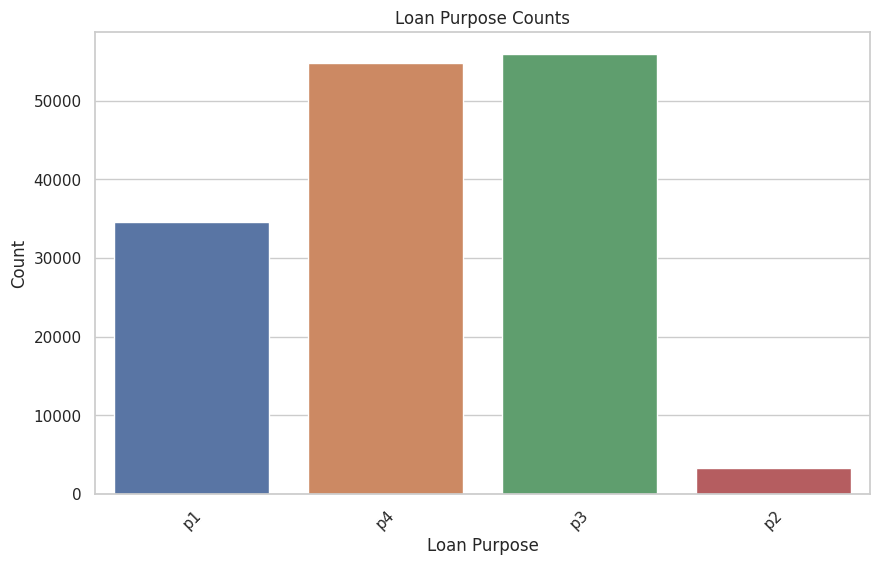

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_purpose', palette='deep')
plt.title('Loan Purpose Counts')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

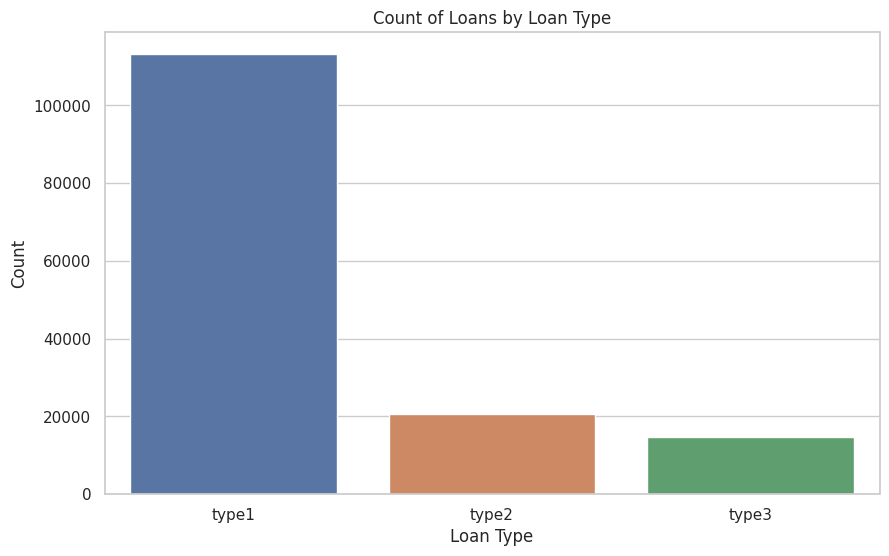

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Count of Loans by Loan Type')
plt.show()


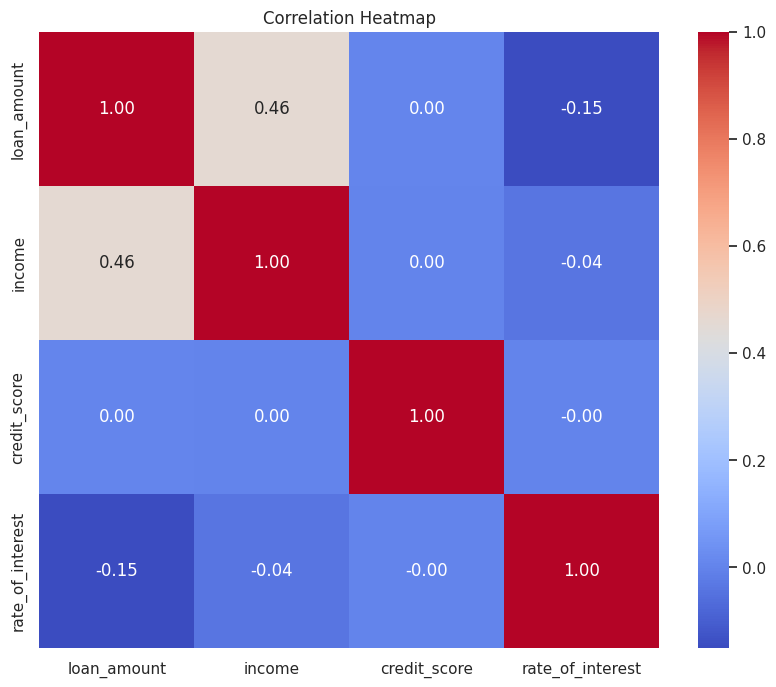

In [50]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['loan_amount', 'income', 'credit_score', 'rate_of_interest']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

These variables were chosen based on their importance in the context of loans and financial analysis. The goal is to gain insights into relationships and patterns within the data that are relevant to  analysis goals.

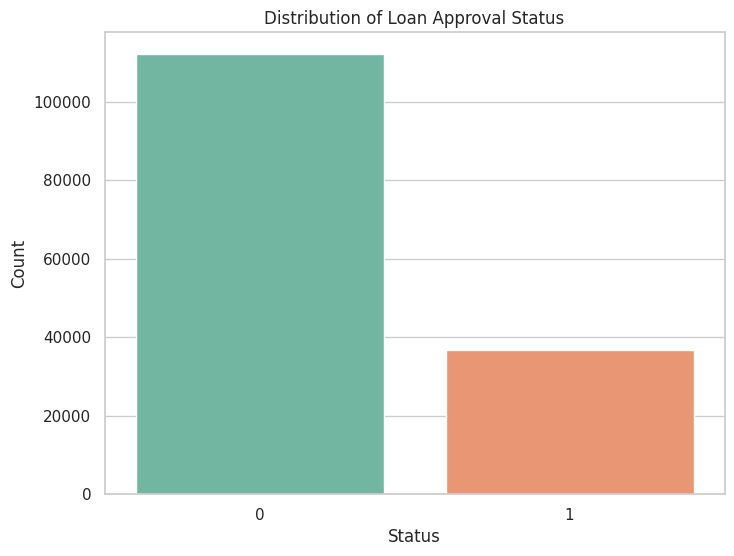

In [51]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot for the "Status" column
plt.figure(figsize=(8, 6))
sns.countplot(x="status", data=df, palette="Set2")

# Add labels and a title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Approval Status")

# Show the plot
plt.show()


In [52]:
df["status"].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: status, dtype: float64

**Observation:** There is an imbalance between classes. Therefore, I will address this imbalance in the preprocessing and modeling steps to ensure robust model performance.







##  Data Cleaning

**Gender Column:** Due to ethical considerations and potential legal restrictions (like those from the Equal Credit Opportunity Act in the U.S.), using gender as a predictor in loan default models is generally discouraged and could be considered discriminatory. Then drop the gender column.

In [53]:
# Drop the gender column
df = df.drop(columns='gender')

**Year Column:**  Let's analyze the effects of years.

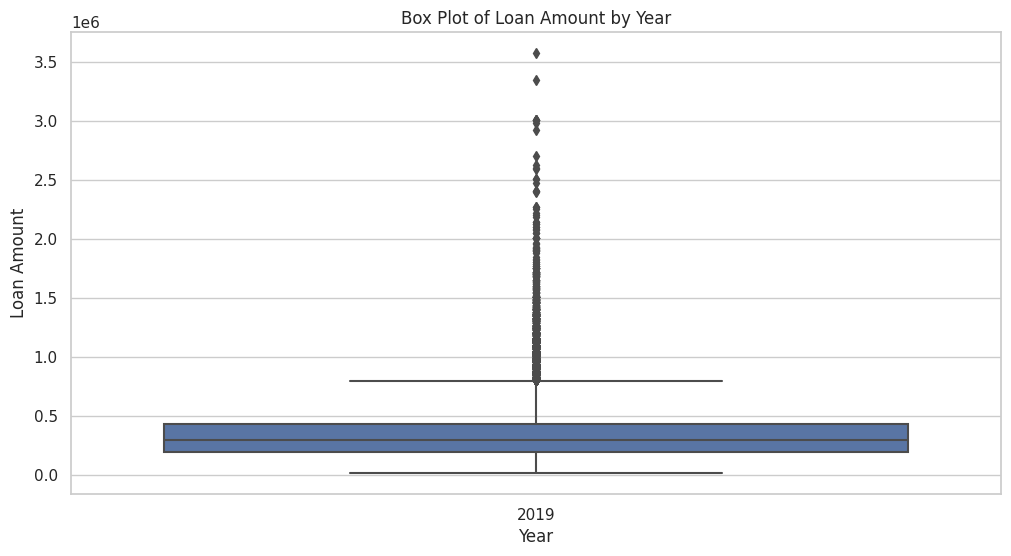

In [54]:
# Create a box plot for 'loan_amount' by year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(x='year', y='loan_amount', data=df)
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Loan Amount')  # Set y-axis label
plt.title('Box Plot of Loan Amount by Year')  # Set plot title

plt.show()



Above boxplot shows that the data mainly has the info from 2019. Lets double-check whether there is an outlier.

In [55]:
 #Filter rows where 'year' is different from 2019
different_years = df[df['year'] != 2019]

# Count the number of rows
count_different_years = len(different_years)

# Print the count and the IDs
print(f"Number of rows with year different from 2019: {count_different_years}")


Number of rows with year different from 2019: 0


So, there is only one spesific year, 2019,  therefore we cannot use year in time-analysis. Drop it.


In [56]:
df = df.drop(columns='year')

Here are more observations regarding construction_type and secured_by columns:

In [57]:
construction_type_counts = df['construction_type'].value_counts()
secured_by_counts=df['secured_by'].value_counts()
# Print the counts
print(construction_type_counts)
print(secured_by_counts)


sb    148637
mh        33
Name: construction_type, dtype: int64
home    148637
land        33
Name: secured_by, dtype: int64


**Interpretation:** Dropping these columns helps address class imbalance issues and ensures that the model focuses on more informative and balanced features, leading to improved model performance and interpretability.

In [58]:
df.drop(['id','secured_by', 'construction_type'], axis=1, inplace=True)


In [59]:
total_units_counts = df['total_units'].value_counts()

print(total_units_counts)


1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64


 - I will address class imbalance during preprocessing to retain the 'total_units' column and enhance model performance.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   approv_in_adv              147762 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148536 non-null  object 
 4   credit_worthiness          148670 non-null  object 
 5   open_credit                148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   interest_rate_spread       112031 non-null  float64
 10  upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  neg_ammortization          148549 non-null  object 
 13  interest_only              14

## Quick Summary until now

- Gender, ID, year, construction_type, secured_by are dropped.
- There are missing values and I will fill these values in a Pipeline in the modelling stage.  

## Preprocessing

## Age is object!

Credit Behavior by Age Group: Different age groups might exhibit distinct credit behaviors. For example, younger borrowers might have a different default risk compared to older ones due to factors like job stability, income levels, and financial obligations.

In [61]:
# Convert age ranges to ordinal values
# Convert all entries in 'age' to strings and handle NaN values
df['age'] = df['age'].astype(str)

df['age'] = df['age'].replace('nan', 'unknown')

# Now we can sort the unique age range strings and create the ordinal mapping
age_ranges = sorted(df['age'].unique())
ordinal_age_mapping = {age_range: index for index, age_range in enumerate(age_ranges)}
df['age_ordinal'] = df['age'].map(ordinal_age_mapping)


**Remark: ** Note that the alternative approach to above code is creating a pipeline as below:
***
#Define the encoding for the ordinal 'age' column

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[age_ranges]))  
])
***

In [62]:
# Drop the original age column
df = df.drop(columns=['age'])

In [63]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Confirm the lists of categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'occupancy_type', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region', 'security_type']

Numerical Columns:
['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'credit_score', 'ltv', 'status', 'dtir1', 'age_ordinal']


## Back to the missing values! Handling strategy.  

In [64]:
(df.isnull().sum()/len(df))*100

loan_limit                    2.249277
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
credit_worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
interest_rate_spread         24.644515
upfront_charges              26.664425
term                          0.027578
neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
occupancy_type                0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
credit_score                  0.000000
co-applicant_credit_type      0.000000
submission_of_application     0.134526
ltv                          10.155378
region                        0.000000
security_type            

+ Given the missing data information, I want to have a dual approach of column-specific imputation coupled with pipeline integration. For columns with substantial missing values, such as rate_of_interest, Interest_rate_spread, Upfront_charges, property_value, LTV, and dtir1, an in-depth analysis to determine the appropriate imputation method is better.

+ Then, I plan to systematize the chosen imputation methods within a ColumnTransformer, ensuring a consistent and automated application of these methods to both the training and testing sets.


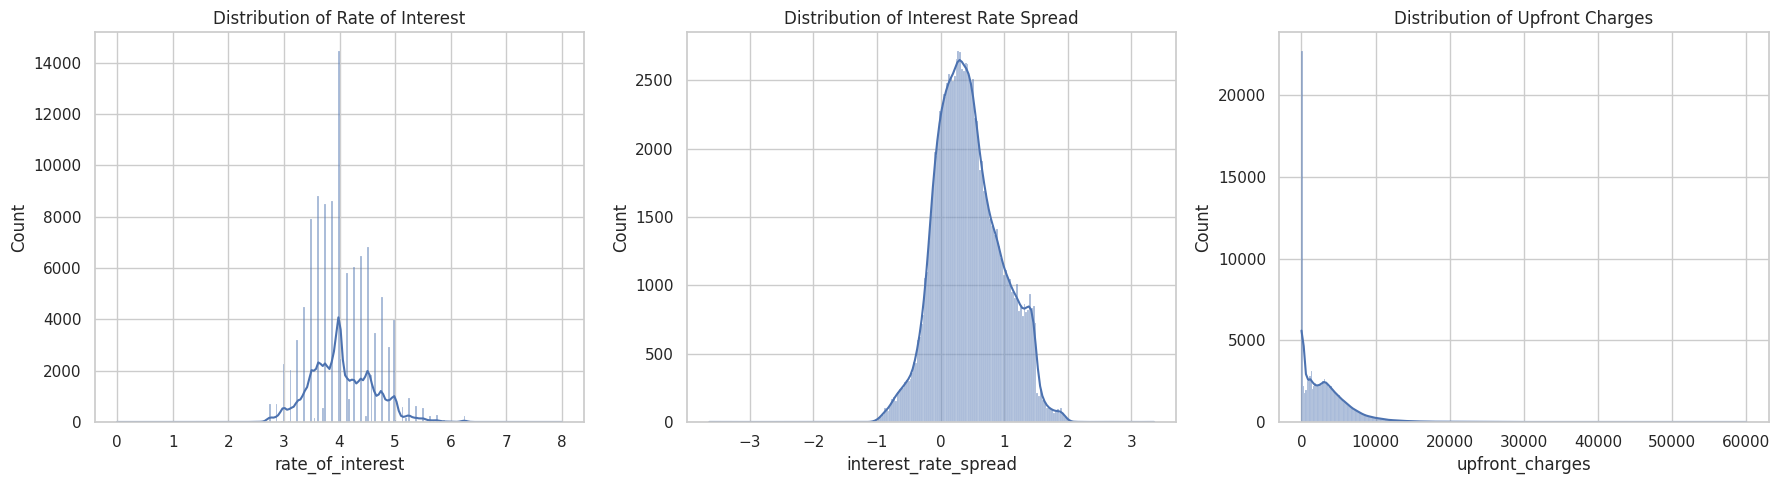

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a specified figure size
plt.figure(figsize=(18, 5))

# Histogram for 'rate_of_interest'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.histplot(df['rate_of_interest'].dropna(), kde=True)
plt.title('Distribution of Rate of Interest')

# Histogram for 'interest_rate_spread'
plt.subplot(1, 3, 2)
sns.histplot(df['interest_rate_spread'].dropna(), kde=True)
plt.title('Distribution of Interest Rate Spread')

# Histogram for 'upfront_charges'
plt.subplot(1, 3, 3)
sns.histplot(df['upfront_charges'].dropna(), kde=True)
plt.title('Distribution of Upfront Charges')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Explanation of above histograms:
+ The "Rate of Interest" and "Interest Rate Spread" features, exhibiting normal distributions, are well-suited for mean imputation when addressing missing values. The mean is a reliable indicator of central tendency for symmetric distributions, offering a balanced central point that reflects the typical values of these features.

+ Conversely, "Upfront Charges" display a right-skewed distribution, suggesting that a significant number of very high values are pulling the mean to the right. Therefore, the median, which is not swayed by such outliers, is a better choice for imputation. Using the median ensures that the imputed values align more closely with the most common range of the data, preserving its original distributional characteristics.

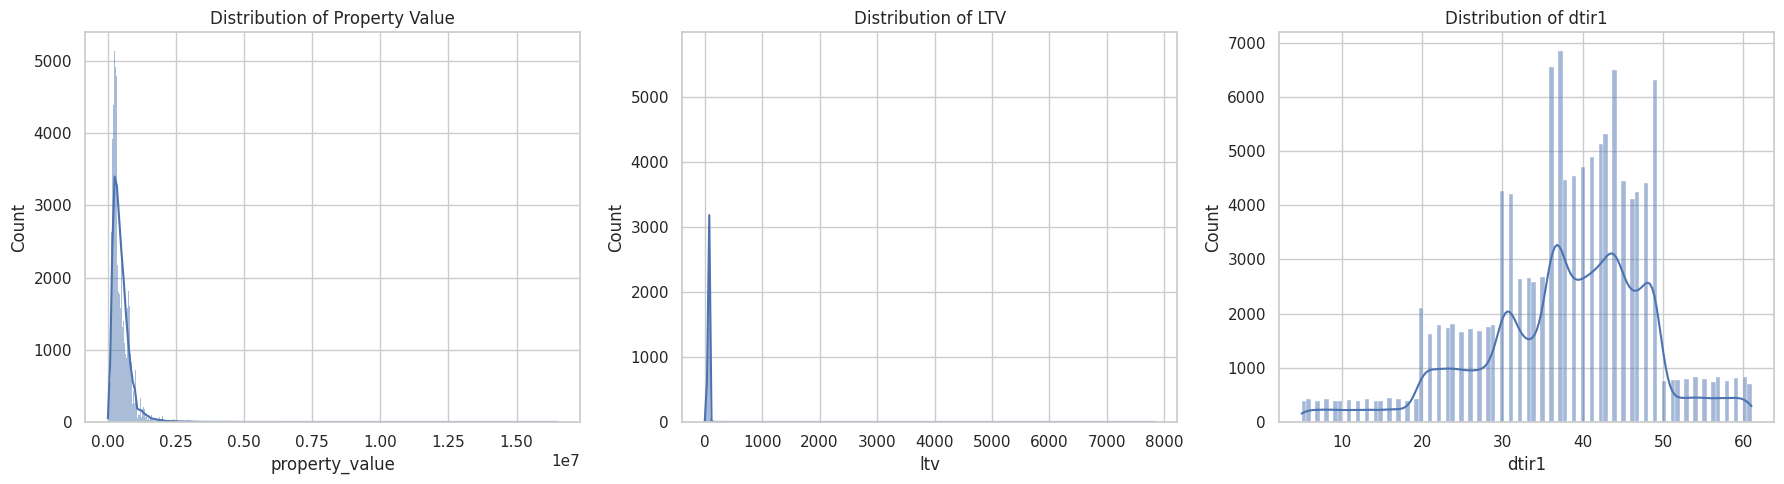

In [66]:
# Set up the matplotlib figure with a specified figure size
plt.figure(figsize=(18, 5))

# Histogram for 'property_value'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.histplot(df['property_value'].dropna(), kde=True)
plt.title('Distribution of Property Value')

# Histogram for 'LTV'
plt.subplot(1, 3, 2)
sns.histplot(df['ltv'].dropna(), kde=True)
plt.title('Distribution of LTV')

# Histogram for 'dtir1'
plt.subplot(1, 3, 3)
sns.histplot(df['dtir1'].dropna(), kde=True)
plt.title('Distribution of dtir1')


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


* We will have the similar approach explained for previous histograms. Detailed operations will be performed in the preprocess stage.

In [67]:
from sklearn.impute import SimpleImputer

# Separate columns with different imputation strategies
columns_to_fill_with_mean = ['rate_of_interest', 'interest_rate_spread', 'dtir1']
columns_to_fill_with_median = ['upfront_charges', 'property_value', 'ltv', 'income']

# Impute columns that need mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df[columns_to_fill_with_mean] = mean_imputer.fit_transform(df[columns_to_fill_with_mean])

# Impute columns that need median imputation
median_imputer = SimpleImputer(strategy='median')
df[columns_to_fill_with_median] = median_imputer.fit_transform(df[columns_to_fill_with_median])



In [68]:
(df.isnull().sum()/len(df))*100

loan_limit                   2.249277
approv_in_adv                0.610749
loan_type                    0.000000
loan_purpose                 0.090133
credit_worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.000000
interest_rate_spread         0.000000
upfront_charges              0.000000
term                         0.027578
neg_ammortization            0.081388
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.000000
occupancy_type               0.000000
total_units                  0.000000
income                       0.000000
credit_type                  0.000000
credit_score                 0.000000
co-applicant_credit_type     0.000000
submission_of_application    0.134526
ltv                          0.000000
region                       0.000000
security_type                0.000000
status      

The features with major missing values are imputed. I will perform the imputing method for remaining features (low missing value percentages) in the pipeline design.

In [69]:
## The class for model evaluations
from sklearn.model_selection import cross_val_score, StratifiedKFold
class EvaluationMetrics:
    #model_df =[]
    model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Train Recall', 'Train Precision', 'Train F1-Score',
                                              'Train Log Loss','Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1-Score',
                                              'Test Log Loss', 'Validation Accuracy', 'Validation Recall', 'Validation Precision',
                                              'Validation F1-Score'])

    def __init__(self, pipe, X_train, X_test, y_train, y_test, X_val, y_val):
        self.pipe = pipe
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.X_val = X_val
        self.y_val = y_val

    def print_scores(self):
        # Training set predictions
        y_train_pred = self.pipe.predict(self.X_train)
        y_train_pred_proba = self.pipe.predict_proba(self.X_train)
        train_results_dict = {'accuracy': accuracy_score(self.y_train, y_train_pred),
                              'recall': recall_score(self.y_train, y_train_pred, average='weighted'),
                              'precision': precision_score(self.y_train, y_train_pred, average='weighted'),
                              'f1_score': f1_score(self.y_train, y_train_pred, average='weighted'),
                              'log_loss': log_loss(self.y_train, y_train_pred_proba)}

        # Test set predictions
        y_test_pred = self.pipe.predict(self.X_test)
        y_test_pred_proba = self.pipe.predict_proba(self.X_test)
        test_results_dict = {'accuracy': accuracy_score(self.y_test, y_test_pred),
                             'recall': recall_score(self.y_test, y_test_pred, average='weighted'),
                             'precision': precision_score(self.y_test, y_test_pred, average='weighted'),
                             'f1_score': f1_score(self.y_test, y_test_pred, average='weighted'),
                             'log_loss': log_loss(self.y_test, y_test_pred_proba)}

        # Validation set predictions
        y_val_pred = self.pipe.predict(self.X_val)
        y_val_pred_proba = self.pipe.predict_proba(self.X_val)
        val_results_dict = {'accuracy': accuracy_score(self.y_val, y_val_pred),
                            'recall': recall_score(self.y_val, y_val_pred, average='weighted'),
                            'precision': precision_score(self.y_val, y_val_pred, average='weighted'),
                            'f1_score': f1_score(self.y_val, y_val_pred, average='weighted'),
                            'log_loss': log_loss(self.y_val, y_val_pred_proba)}

        return train_results_dict, test_results_dict, val_results_dict




    def cross_validation(self, cv=5, scoring='roc_auc'):
        # Using Stratified K-Folds for cross-validation
        stratified_cv = StratifiedKFold(n_splits=cv)

        # Perform cross-validation using the instance attributes
        scores = cross_val_score(self.pipe, self.X_train, self.y_train, cv=stratified_cv, scoring=scoring)

        return np.mean(scores), np.std(scores)


    # Plots ROC curve for all classes
    def plot_roc_curve_ovr(self):
        # Calculate FPR and TPR for each class (One-vs-Rest)
        y_test_pred_proba = self.pipe.predict_proba(self.X_test)
        n_classes = y_test_pred_proba.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(self.y_test, y_test_pred_proba[:, i], pos_label=i)

        # Plot ROC curve for each class (One-vs-Rest)
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - One-vs-Rest')
        plt.legend(loc="lower right")
        plt.show()

    # Plots confusion matrix
    def plot_confusion_matrix(self, y_train, y_train_pred):
        cm = confusion_matrix(y_train, y_train_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    def record_results(self, model_name, train_results, test_results, val_results):
        new_row = {
            'Model': model_name,
            'Train Accuracy': train_results['accuracy'],
            'Train Recall': train_results['recall'],
            'Train Precision': train_results['precision'],
            'Train F1-Score': train_results['f1_score'],
            'Train Log Loss': train_results['log_loss'],
            'Test Accuracy': test_results['accuracy'],
            'Test Recall': test_results['recall'],
            'Test Precision': test_results['precision'],
            'Test F1-Score': test_results['f1_score'],
            'Test Log Loss': test_results['log_loss']
        }

        # Add validation results only if val_results is not None
        if val_results is not None:
            new_row.update({
                'Validation Accuracy': val_results['accuracy'],
                'Validation Recall': val_results['recall'],
                'Validation Precision': val_results['precision'],
                'Validation F1-Score': val_results['f1_score'],
                'Validation Log Loss': val_results['log_loss']
            })

        # Append the new row to the DataFrame
        new_row_df = pd.DataFrame(new_row, index=[0])
        self.model_df = pd.concat([self.model_df, new_row_df], ignore_index=True)

## Dummmy Classifier

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop('status', axis=1),  # Drop the target variable to create features
    df['status'],               # Target variable
    random_state=0,             # Ensures reproducibility
    test_size=0.2,              # Proportion of dataset to include in initial train split
    stratify=df['status'],      # Ensures train and test sets have similar class distributions
    shuffle=True                # Shuffles the data before splitting
)

# Further split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    random_state=0,             # Ensures reproducibility
    test_size=0.3,              # Proportion of dataset to include in validation split
    stratify=y_temp,            # Ensures validation and test sets have similar class distributions
    shuffle=True                # Shuffles the data before splitting
)

# Create a pipeline with a dummy classifier
pipeline_dummy = Pipeline([
    ('dummy_classifier', DummyClassifier(strategy='most_frequent'))  # You can choose different strategies
])

# Train the pipeline (dummy classifier)
pipeline_dummy.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_dummy.predict(X_test)

# Calculate accuracy as a baseline metric (replace with appropriate evaluation metrics)
accuracy = accuracy_score(y_test, y_pred)


# Now you can use EvaluationMetrics with X_train, X_test, y_train, y_test, X_val, y_val
dummy_metrics = EvaluationMetrics(pipeline_dummy, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = dummy_metrics.print_scores()
dummy_metrics.record_results('DummyModel', train_results, test_results, val_results)
dummy_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,DummyModel,0.753557,0.753557,0.567847,0.647652,8.882723,0.753503,0.753503,0.567767,0.64758,8.884653,0.753567,0.753567,0.567864,0.647667,8.882328


## Logistic Regression

In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)  # Use categorical_features here
    ])

logistic_regression_classifier = LogisticRegression(
    random_state=42,
    class_weight='balanced'  # Use 'balanced' for automatic class weighting
)


pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logistic_regression_classifier)
])

# Train the pipeline
pipeline_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_lr.predict(X_test)


In [72]:
lr_metrics = EvaluationMetrics(pipeline_lr, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = lr_metrics.print_scores()
lr_metrics.record_results('Logistic Regression', train_results, test_results, val_results)
lr_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,Logistic Regression,0.834928,0.834928,0.837842,0.836245,0.413091,0.839368,0.839368,0.840609,0.839959,0.41132,0.833518,0.833518,0.836304,0.834784,0.418733


In [109]:
# Assuming the last step of your pipeline is the logistic regression model
logistic_regression_model = pipeline_lr.named_steps['classifier']
coefficients = logistic_regression_model.coef_[0]

# If you used a ColumnTransformer for preprocessing, you'll need the feature names
feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()

# Pair each feature name with its coefficient
feature_importance = zip(feature_names, coefficients)

# Sort features by their absolute coefficients
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)


In [113]:
# Selecting top 5 features
top_features = sorted_features[:15]

# Print the top features
for feature, coef in top_features:
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: cat__credit_type_EQUI, Coefficient: 12.720139637227001
Feature: cat__credit_type_EXP, Coefficient: -4.0009232285146
Feature: cat__credit_type_CIB, Coefficient: -3.95624585929519
Feature: cat__credit_type_CRIF, Coefficient: -3.9432239673763383
Feature: cat__lump_sum_payment_lpsm, Coefficient: 1.6736769152326587
Feature: cat__security_type_Indriect, Coefficient: 1.2837933854261034
Feature: cat__submission_of_application_to_inst, Coefficient: 1.0488585316828043
Feature: num__ltv, Coefficient: 0.915752138288382
Feature: cat__neg_ammortization_neg_amm, Coefficient: 0.8927683796460775
Feature: cat__lump_sum_payment_not_lpsm, Coefficient: -0.8539303331914558
Feature: cat__occupancy_type_ir, Coefficient: 0.8476801978798109
Feature: cat__loan_purpose_p2, Coefficient: 0.8194966089809022
Feature: cat__total_units_3U, Coefficient: 0.7918324885555537
Feature: cat__loan_limit_ncf, Coefficient: 0.7283324790304215
Feature: cat__co-applicant_credit_type_CIB, Coefficient: 0.6221740050286825


class_weight='balanced' in logistic regression automatically assigns weights inversely proportional to class frequencies in the input data. This means that in an imbalanced dataset, the minority class (class 1 in your case) automatically gets a higher weight, not the majority class (class 0). The goal is to increase the model's sensitivity to the minority class, which is typically underrepresented in an imbalanced dataset.

In [73]:
!pip install shap


In [74]:
import pickle

# Save the logistic regression model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(pipeline_lr, f)


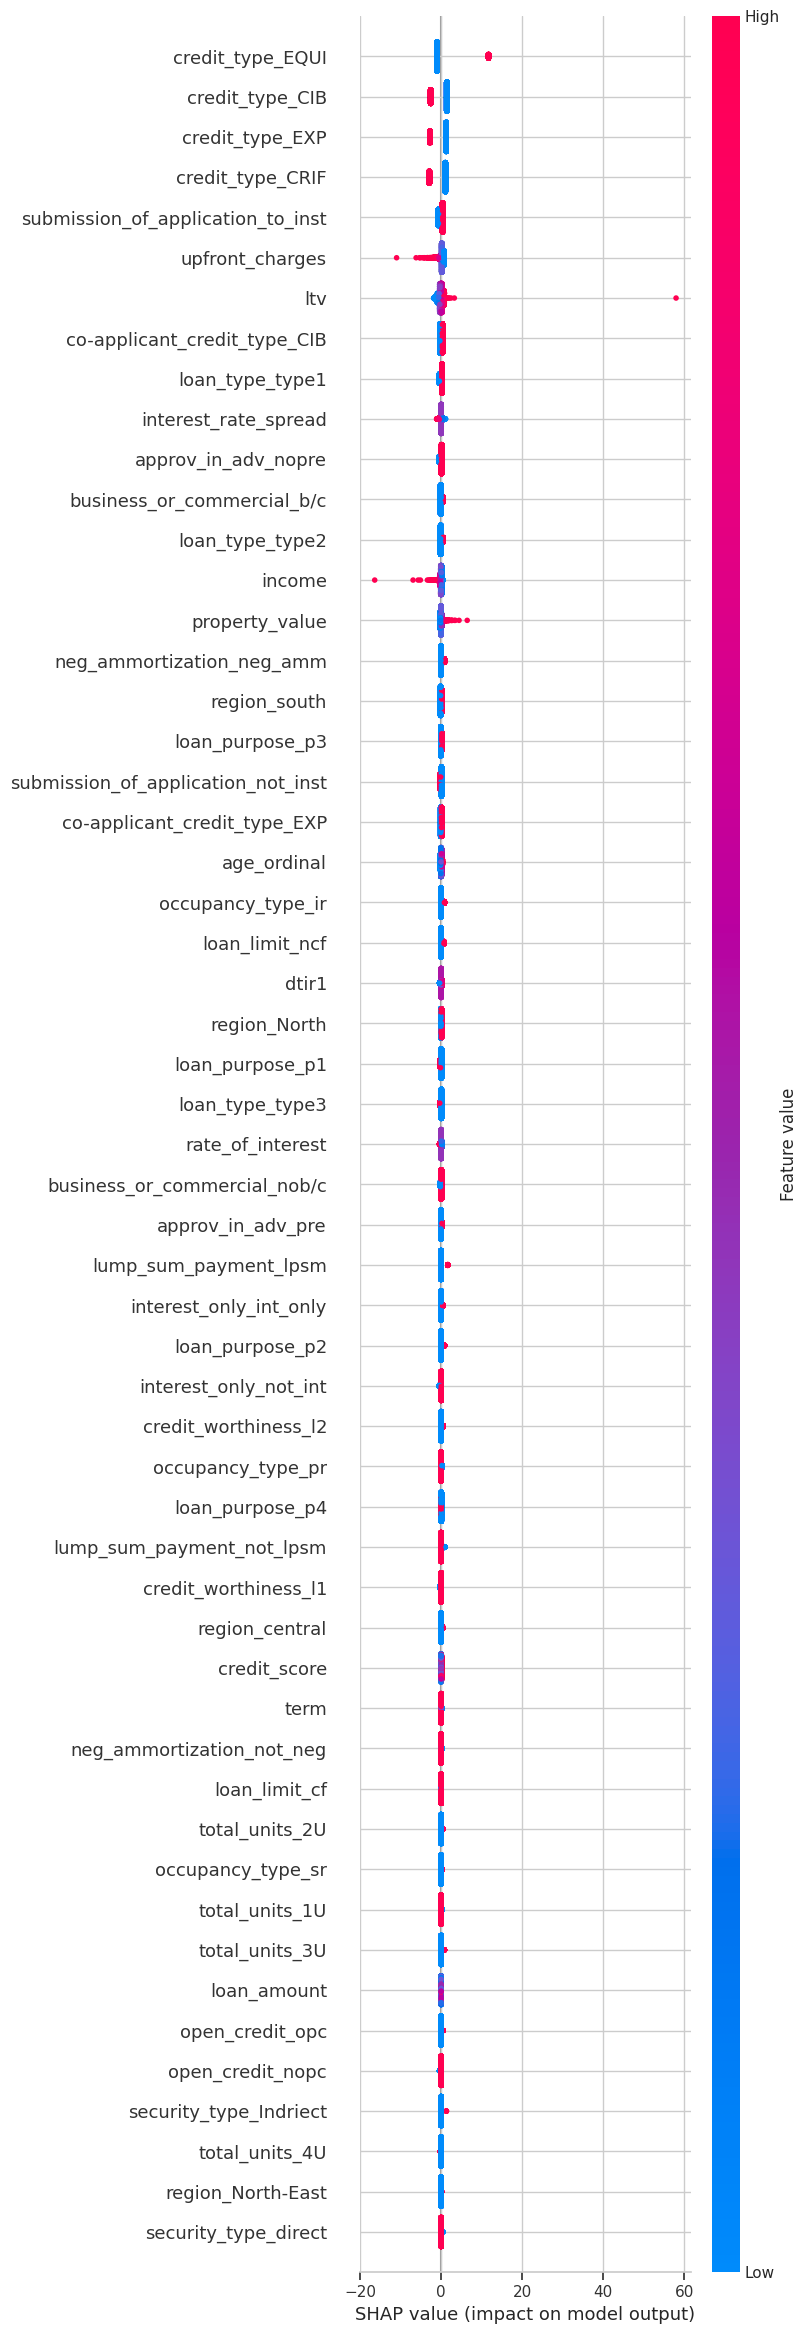

In [75]:
import shap

# Function to accurately extract feature names from ColumnTransformer
def get_feature_names(column_transformer):
    """Get feature names from a ColumnTransformer"""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            output_features.extend(features)  # Append original feature names
            continue
        transformer = pipe.named_steps['onehot'] if 'onehot' in pipe.named_steps else pipe
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names = transformer.get_feature_names_out(features)
            output_features.extend(feature_names)
        else:
            output_features.extend(features)

    return output_features

# Apply this function to your preprocessor
feature_names = get_feature_names(pipeline_lr.named_steps['preprocessor'])
# Transform the training and test datasets
X_train_processed = pipeline_lr.named_steps['preprocessor'].transform(X_train)
X_test_processed = pipeline_lr.named_steps['preprocessor'].transform(X_test)
# Convert the processed data back to a DataFrame for ease of use with SHAP
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(pipeline_lr.named_steps['classifier'], X_train_processed_df)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_processed_df)

# For individual predictions
shap.initjs()
i = 0  # Example index
shap.force_plot(explainer.expected_value, shap_values[i], X_test_processed_df.iloc[i])
total_features = X_test_processed_df.shape[1]

# Create a dot plot summary plot with simplified color scheme
shap.summary_plot(shap_values, X_test_processed_df, feature_names=feature_names, plot_type='dot', color='coolwarm', max_display=total_features)


In [76]:
import numpy as np

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Pair each feature with its mean absolute SHAP value
feature_shap_pairs = zip(feature_names, mean_abs_shap)

# Sort the features by their mean absolute SHAP value, descending
sorted_feature_shap_pairs = sorted(feature_shap_pairs, key=lambda x: x[1], reverse=True)

# Display the sorted list
for feature, shap_value in sorted_feature_shap_pairs:
    print(f"{feature}: {shap_value}")


credit_type_EQUI: 2.1410785426813708
credit_type_CIB: 1.7647889905583816
credit_type_EXP: 1.6735035309390842
credit_type_CRIF: 1.5734794097729816
submission_of_application_to_inst: 0.47894659316097216
upfront_charges: 0.4029155620153409
ltv: 0.3454982812554659
co-applicant_credit_type_CIB: 0.31108700251434124
loan_type_type1: 0.23536949884931047
interest_rate_spread: 0.2342478223778887
approv_in_adv_nopre: 0.16065889078921186
loan_type_type2: 0.158801143338026
business_or_commercial_b/c: 0.158801143338026
income: 0.15609262792569709
property_value: 0.15445246758900125
neg_ammortization_neg_amm: 0.14758248905184462
region_south: 0.13600128863633099
loan_purpose_p3: 0.12198576179630324
submission_of_application_not_inst: 0.10462077050395957
co-applicant_credit_type_EXP: 0.09878628850584144
age_ordinal: 0.0890547729344607
occupancy_type_ir: 0.08731837698011598
loan_limit_ncf: 0.08723824539213891
dtir1: 0.07792669964537006
region_North: 0.07465473311129214
loan_purpose_p1: 0.07400341785321

Feature Analysis

In [77]:
# Define the threshold
shap_threshold = 0.01

# Pair each feature with its mean absolute SHAP value
feature_shap_pairs = zip(feature_names, mean_abs_shap)

# Filter out features with SHAP values below the threshold
low_impact_features = [feature for feature, shap_value in feature_shap_pairs if shap_value < shap_threshold]

# Print the low impact features
print("Features with SHAP values below 0.01:")
for feature in low_impact_features:
    print(feature)

Features with SHAP values below 0.01:
loan_amount
open_credit_nopc
open_credit_opc
occupancy_type_sr
total_units_1U
total_units_2U
total_units_3U
total_units_4U
region_North-East
security_type_Indriect
security_type_direct


# Logistic Regression- features
Remember that the data is imbalanced. For that reason, I used stratify and SMOTE tecniques. But also I want to see the effects of adjusting weights in logistic regression on imbalance.

**Interpretation:** The cross-validation results shows that the feature elimination process was successful. The selected features to retain are providing sufficient information for the model to make accurate and consistent predictions.

# Logistic Regression-  Weighted Version 2

- **Interpretation:**

## Logistic Regression- Hyperparameter tuning (Grid Search)

In [79]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'classifier__penalty': ['l1', 'l2'],         # Regularization penalty (L1 or L2)
    'classifier__C': [0.001, 0.01, 0.1, 1.0],    # Inverse of regularization strength
    'classifier__solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data with updated features
grid_search_lr.fit(X_train, y_train)

# You can then check the best parameters and the best score
print("Best parameters:", grid_search_lr.best_params_)
print("Best ROC-AUC score:", grid_search_lr.best_score_)


Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best ROC-AUC score: 0.8547409607413672


Best Hyperparameters:
{'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Score (Accuracy): 0.8553620540836773


In [80]:

# Define a pipeline with preprocessing and the logistic regression model with best parameters
best_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessing steps
    ('classifier', LogisticRegression(C=1.0, max_iter=100, penalty='l1', solver='liblinear'))  # Best parameters
])

# Fit the pipeline to the updated training data
best_lr_pipeline.fit(X_train, y_train)

# Make predictions using the pipeline on the updated test data
y_pred = best_lr_pipeline.predict(X_test)


In [81]:
best_lr_metrics = EvaluationMetrics(best_lr_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = best_lr_metrics.print_scores()
best_lr_metrics.record_results('Logistic Regression Grid Search', train_results, test_results, val_results)
best_lr_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,Logistic Regression Grid Search,0.869056,0.869056,0.877242,0.854194,0.338377,0.871987,0.871987,0.880351,0.857784,0.336666,0.866045,0.866045,0.874246,0.850405,0.345314


### Logistic Regression - Cross validation

In [82]:
# Create an instance of the EvaluationMetrics class
cross_lr_metrics = EvaluationMetrics(best_lr_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Perform cross-validation
mean_cv_score, std_cv_score = cross_lr_metrics.cross_validation(cv=2)

# Display the mean and standard deviation of cross-validation scores
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")


Mean Cross-Validation Score: 0.8535
Standard Deviation of Cross-Validation Scores: 0.0019


**Interpretation:** A mean Cross-Validation Score of 0.8535 with a low Standard Deviation indicates that the logistic regression model is performing well on the training data and is relatively stable in its performance across different subsets of the data.  

### Support Vector Machine (SVM)

In [ ]:
#from sklearn.svm import SVC
#from sklearn.calibration import CalibratedClassifierCV

# Create an SVM classifier with probability estimates enabled
#svm_classifier = SVC(probability=True, random_state=42)

# Wrap the classifier in a CalibratedClassifierCV to enable probability estimates
#calibrated_classifier = CalibratedClassifierCV(svm_classifier, method='sigmoid')

# Create an SVM pipeline with the calibrated classifier
#svm_pipeline = ImbPipeline(steps=[
    #('preprocessor', preprocessor),  # Reuse the preprocessing steps
    #('smote', SMOTE(random_state=42)),  # Reuse SMOTE
    #('classifier', calibrated_classifier)  # Use the calibrated SVM classifier
## ])

# Train the SVM pipeline
#svm_pipeline.fit(X_train, y_train)


In [ ]:
#svm_metrics = EvaluationMetrics(svm_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)
#train_results, test_results, val_results = svm_metrics.print_scores()
#svm_metrics.record_results('SVM', train_results, test_results, val_results)

In [ ]:
#svm_metrics.model_df

### SVM- Cross Validation

In [ ]:
#cross_svm_metrics = EvaluationMetrics(svm_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Perform cross-validation
#mean_cv_score, std_cv_score = cross_svm_metrics.cross_validation(cv=2)

# Display the mean and standard deviation of cross-validation scores
#print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
#print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")


## XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the preprocessed data back to DataFrame for SMOTE application
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed_df, y_train)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Create an imbalanced pipeline with only the XGBoost classifier (SMOTE is applied before)
xgb_pipeline = ImbPipeline(steps=[
    ('classifier', xgb_classifier)
])

# Fit the pipeline to the SMOTE-applied training data
xgb_pipeline.fit(X_train_smote, y_train_smote)

# Make predictions using the pipeline
y_pred = xgb_pipeline.predict(X_test_preprocessed)

# Evaluate the model
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train_preprocessed_df, X_test_preprocessed, y_train, y_test, None, None)
train_results, test_results, _ = xgb_metrics.print_scores()
xgb_metrics.record_results('XGBoost with SMOTE', train_results, test_results, None)

# Display the results
xgb_metrics.model_df

In [ ]:
from xgboost import XGBClassifier

# Define the XGBoost classifier with early stopping
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,  # To avoid a warning from XGBoost regarding label encoding
    eval_metric='auc'  # Evaluation metric for early stopping
)

# Rest of your pipeline and training process remains the same

# When fitting, include an evaluation set and set early_stopping_rounds
xgb_pipeline.fit(X_train, y_train, classifier__eval_set=[(X_val, y_val)], classifier__early_stopping_rounds=10)

# Rest of the evaluation process remains the same


In [ ]:
## Overfitting

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Redefine the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing separately
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Check if the preprocessed data has the expected shape
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

# Convert the preprocessed data to DataFrame (if needed for inspection)
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    reg_alpha=0.1,  # L1 regularization (adjust the value)
    reg_lambda=1.0  # L2 regularization (adjust the value)
)


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an XGBoost pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Include SMOTE here
    ('classifier', xgb_classifier)
])

# Train the XGBoost pipeline
xgb_pipeline.fit(X_train_smote, y_train_smote)



# Preprocess the test data using the same preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed_df = preprocessor.transform(X_test)

# Make predictions on the preprocessed test data
y_pred = xgb_pipeline.predict(X_test_preprocessed_df)




# Assuming EvaluationMetrics is defined correctly
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train_preprocessed_df, X_test_preprocessed_df, y_train, y_test, None, None)

# Calculate and record the evaluation metrics
train_results, test_results, _ = xgb_metrics.print_scores()
xgb_metrics.record_results('XGBoost', train_results, test_results, None)


# Access the model_df attribute to get the results
xgb_metrics.model_df



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  # Corrected import for SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd


# Assuming you have already defined X_train, X_test, y_train, y_test

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the preprocessed data to DataFrame for SMOTE application
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())


# Define the XGBoost classifier with regularization
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0  # L2 regularization
)

# Create an XGBoost pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Include SMOTE here
    ('classifier', xgb_classifier)
])

# Fit the pipeline to the SMOTE-applied training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the preprocessed test data
y_pred = xgb_pipeline.predict(X_test_preprocessed_df)





In [ ]:
# Evaluate the model using EvaluationMetrics
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train_preprocessed_df, X_test_preprocessed_df, y_train, y_test, None, None)

# Calculate and print the evaluation metrics
train_results, test_results, _ = xgb_metrics.print_scores()

# Record the results in the class's internal DataFrame
xgb_metrics.record_results('XGBoost with SMOTE', train_results, test_results, None)

# Display the results stored in the class's DataFrame
print(xgb_metrics.model_df)


Try earky stop

In [ ]:
## Overfitting

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Define the XGBoost classifier with early stopping
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,  # You can set a large number of estimators
    learning_rate=0.1,
    random_state=42
)

# Fit the classifier with early stopping
eval_set = [(X_train, y_train), (X_val, y_val)]  # Specify the evaluation dataset
xgb_classifier.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,  # Number of rounds without improvement before stopping
    eval_metric='logloss',     # Evaluation metric to monitor
    eval_set=eval_set,
    verbose=True
)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create an XGBoost pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Include SMOTE here
    ('classifier', xgb_classifier)
])

# Train the XGBoost pipeline on the training data with encoded target variable
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_pipeline.predict(X_test)



# Now, create an instance of EvaluationMetrics with the XGBoost pipeline
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Calculate and record the evaluation metrics
train_results, test_results, val_results = xgb_metrics.print_scores()
xgb_metrics.record_results('XGBOOST', train_results, test_results, val_results)

# Access the model_df attribute to get the results
xgb_metrics.model_df



In [ ]:
# Now, create an instance of EvaluationMetrics with the XGBoost pipeline
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train, X_test, y_train_encoded, y_pred_original, X_val, y_val)

# Calculate and record the evaluation metrics
train_results, test_results, val_results = xgb_metrics.print_scores()
xgb_metrics.record_results('XGBOOST', train_results, test_results, val_results)

# Access the model_df attribute to get the results
xgb_metrics.model_df

In [ ]:
# Evaluate the model using EvaluationMetrics
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train_preprocessed_df, X_test_preprocessed_df, y_train, y_test, None, None)
train_results, test_results, _ = xgb_metrics.print_scores()
xgb_metrics.record_results('XGBoost with SMOTE', train_results, test_results, None)

# Display the results
xgb_metrics.model_df

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  # Corrected import for SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd

# The rest of your code follows...

# Assuming you have already defined X_train_updated, X_test_updated, y_train, y_test
# And that you have lists of numerical_features and categorical_features

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the XGBoost classifier with regularization
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0  # L2 regularization
)

# Create an XGBoost pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_classifier)
])

# Fit the pipeline to the original training data
xgb_pipeline.fit(X_train_updated, y_train)

# Make predictions on the original test data
y_pred = xgb_pipeline.predict(X_test_updated)

# Evaluate the model using EvaluationMetrics (assuming this class is already defined)
xgb_metrics = EvaluationMetrics(xgb_pipeline, X_train_updated, X_test_updated, y_train, y_test, None, None)
xgb_metrics.record_results('XGBoost with SMOTE', train_results, test_results, None)

# Display the results
xgb_metrics.model_df


## Decision Tree

In [83]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the Decision Tree Classifier pipeline with SMOTE
decision_tree_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),            # SMOTE for oversampling
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline on the training set
decision_tree_pipeline.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = decision_tree_pipeline.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = decision_tree_pipeline.predict(X_test)


Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15684
           1       1.00      1.00      1.00      5129

    accuracy                           1.00     20813
   macro avg       1.00      1.00      1.00     20813
weighted avg       1.00      1.00      1.00     20813



In [84]:
print("Depth of the decision tree:", decision_tree_pipeline.named_steps['classifier'].tree_.max_depth)


Depth of the decision tree: 3


In [85]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(decision_tree_pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [1. 1. 1. 1. 1.]


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier pipeline
decision_tree_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score: 1.0


Using ensemble methods like Random Forests or Gradient Boosting can also help reduce overfitting as they combine the predictions of several base estimators to improve generalizability and robustness.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest Classifier pipeline
random_forest_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model on the training set
random_forest_pipeline.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = random_forest_pipeline.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
y_test_pred = random_forest_pipeline.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15684
           1       1.00      1.00      1.00      5129

    accuracy                           1.00     20813
   macro avg       1.00      1.00      1.00     20813
weighted avg       1.00      1.00      1.00     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6722
           1       1.00      1.00      1.00      2199

    accuracy                           1.00      8921
   macro avg       1.00      1.00      1.00      8921
weighted avg       1.00      1.00      1.00      8921



In [90]:
# Create an instance of your custom evaluation class with the Random Forest pipeline
evaluation = EvaluationMetrics(random_forest_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Perform cross-validation
mean_cv_score, std_cv_score = evaluation.cross_validation(cv=5, scoring='roc_auc')

# Print the results
print(f"Mean Cross-Validation ROC-AUC Score: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score}")

Mean Cross-Validation ROC-AUC Score: 1.0
Standard Deviation of Cross-Validation Scores: 0.0


In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create an XGBoost Classifier pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = xgb_pipeline.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = xgb_pipeline.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15684
           1       1.00      1.00      1.00      5129

    accuracy                           1.00     20813
   macro avg       1.00      1.00      1.00     20813
weighted avg       1.00      1.00      1.00     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6722
           1       1.00      1.00      1.00      2199

    accuracy                           1.00      8921
   macro avg       1.00      1.00      1.00      8921
weighted avg       1.00      1.00      1.00      8921



## Lightgbm

In [97]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Create a LightGBM Classifier pipeline with SMOTE
lgbm_pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42))
])

# Train the model
lgbm_pipeline_with_smote.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = lgbm_pipeline_with_smote.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = lgbm_pipeline_with_smote.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 89625, number of negative: 89625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12062
[LightGBM] [Info] Number of data points in the train set: 179250, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Info] Number of positive: 29311, number of negative: 89625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1982
[LightGBM] [Info] Number of data points in the train set: 118936, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246443 -> initscore=-1.117671
[LightGBM] [Info] Start training from score -1.117671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Seeing consistently perfect scores across multiple models, including LightGBM, is indeed quite unusual and suggests there might be some fundamental characteristic of your dataset that's leading to these results.

knn

In [95]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier pipeline with SMOTE
knn_pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Train the model on the training set
knn_pipeline_with_smote.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = knn_pipeline_with_smote.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = knn_pipeline_with_smote.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15684
           1       0.73      0.94      0.82      5129

    accuracy                           0.90     20813
   macro avg       0.85      0.91      0.87     20813
weighted avg       0.92      0.90      0.90     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6722
           1       0.73      0.95      0.82      2199

    accuracy                           0.90      8921
   macro avg       0.85      0.92      0.88      8921
weighted avg       0.92      0.90      0.90      8921



In [98]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create a Naive Bayes classifier pipeline with SMOTE
nb_pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),  # assuming 'preprocessor' is already defined
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

# Train the model on the training set
nb_pipeline_with_smote.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = nb_pipeline_with_smote.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = nb_pipeline_with_smote.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15684
           1       1.00      0.61      0.76      5129

    accuracy                           0.90     20813
   macro avg       0.94      0.81      0.85     20813
weighted avg       0.92      0.90      0.90     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6722
           1       1.00      0.62      0.77      2199

    accuracy                           0.91      8921
   macro avg       0.95      0.81      0.85      8921
weighted avg       0.92      0.91      0.90      8921



In [99]:
from imblearn.over_sampling import SMOTE

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)


In [100]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network structure
model = Sequential()
model.add(Dense(64, input_shape=(X_train_smote.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32)


Epoch 1/10
5602/5602 [==============================] - 15s 2ms/step - loss: 0.0419 - accuracy: 0.9855
Epoch 2/10
5602/5602 [==============================] - 12s 2ms/step - loss: 0.0075 - accuracy: 0.9986
Epoch 3/10
5602/5602 [==============================] - 13s 2ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 4/10
5602/5602 [==============================] - 13s 2ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 5/10
5602/5602 [==============================] - 13s 2ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 6/10
5602/5602 [==============================] - 13s 2ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 7/10
5602/5602 [==============================] - 13s 2ms/step - loss: 6.2188e-04 - accuracy: 0.9999
Epoch 8/10
5602/5602 [==============================] - 14s 2ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 9/10
5602/5602 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 10/10
5602/5602 [==============================] - 12s 2ms/step

In [101]:
from sklearn.metrics import classification_report

# Apply the same preprocessing to validation and test sets
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Predict and evaluate on the validation set
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred = (y_val_pred > 0.5).astype("int32")
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Predict and evaluate on the test set
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred = (y_test_pred > 0.5).astype("int32")
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


651/651 [==============================] - 4s 6ms/step
Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15684
           1       1.00      1.00      1.00      5129

    accuracy                           1.00     20813
   macro avg       1.00      1.00      1.00     20813
weighted avg       1.00      1.00      1.00     20813

279/279 [==============================] - 2s 7ms/step
Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6722
           1       1.00      1.00      1.00      2199

    accuracy                           1.00      8921
   macro avg       1.00      1.00      1.00      8921
weighted avg       1.00      1.00      1.00      8921



In [102]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a PCA preprocessing step
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Update your existing preprocessing pipeline (assuming 'preprocessor' is already defined)
pca_preprocessor = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Apply PCA to the training data
X_train_pca = pca_preprocessor.fit_transform(X_train)

# Apply the same transformation to the validation and test sets
X_val_pca = pca_preprocessor.transform(X_val)
X_test_pca = pca_preprocessor.transform(X_test)


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train a Random Forest model on the PCA-transformed training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predict and evaluate on the validation set
y_val_pred = rf_model.predict(X_val_pca)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Predict and evaluate on the test set
y_test_pred = rf_model.predict(X_test_pca)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15684
           1       0.96      0.87      0.91      5129

    accuracy                           0.96     20813
   macro avg       0.96      0.93      0.94     20813
weighted avg       0.96      0.96      0.96     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6722
           1       0.95      0.87      0.91      2199

    accuracy                           0.96      8921
   macro avg       0.96      0.93      0.94      8921
weighted avg       0.96      0.96      0.96      8921



In [104]:
import pandas as pd

# Fit PCA on the preprocessed data (without reducing dimensionality just yet)
pca_full = PCA().fit(preprocessor.transform(df.drop('status', axis=1)))

# Get the PCA components (loadings of each original feature on each component)
components = pd.DataFrame(pca_full.components_, columns=preprocessor.get_feature_names_out())

# Print the components to see which features contribute most to each principal component
print(components)


    num__loan_amount  num__rate_of_interest  num__interest_rate_spread  \
0       5.193761e-01          -2.638673e-01              -4.030477e-01   
1       1.861121e-01           1.758855e-01               3.519603e-02   
2      -1.948081e-01          -6.532636e-01              -5.072347e-01   
3      -1.405089e-01          -8.172253e-02               9.775386e-02   
4       1.375551e-01          -9.110094e-02               8.708513e-02   
5       1.196513e-02          -7.433151e-03               1.198313e-02   
6      -1.067643e-01           1.031590e-01              -2.133057e-01   
7       1.059496e-01          -1.023355e-02               9.599769e-02   
8       1.089043e-01           2.648982e-01              -9.922398e-02   
9      -1.893753e-01           2.172904e-01              -3.378495e-01   
10     -6.684052e-02          -9.319381e-02               7.466520e-03   
11     -3.794741e-02           1.095142e-01              -1.396827e-01   
12     -1.259513e-01           2.33981

In [105]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


KeyboardInterrupt: ignored

In [108]:
   df.head(1)

,loan_limit,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,...,credit_type,credit_score,co-applicant_credit_type,submission_of_application,ltv,region,security_type,status,dtir1,age_ordinal
0,cf,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,...,EXP,758,CIB,to_inst,98.728814,south,direct,1,45.0,0
